## Mr. Yogesh P Murumkar (Mob. 9657080905)
### www.youtube.com/yogeshmurumkar

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/facebook-data/pseudo_facebook.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing

In [3]:
fb_data_df = pd.read_csv('pseudo_facebook.csv')
fb_data_df.head()


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
# check for missing values
print(len(fb_data_df),'Total data available ')
fb_data_df.isnull().sum()

99003 Total data available 


userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [5]:
# there are 177 rows having either gender  or tenure missing, thats 0.1 % of total data
# as missing data is very small part of total data we can drop those rows directly
fb_data_df.dropna(how = 'any', inplace = True)


In [6]:
# now check data types of columns (fields) 
fb_data_df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [7]:
# only change needed is to take tenure as int
fb_data_df ['tenure'] = fb_data_df['tenure'].astype('int')

# Age group analysis

In [8]:
min(fb_data_df['age']), max(fb_data_df['age'])

(13, 113)

In [9]:
# min age is 13 and max is 113 so we will take 10 as lowerbound and 120 as upperbound for creating age groups
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
fb_data_df['age_group'] = pd.cut(fb_data_df['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20


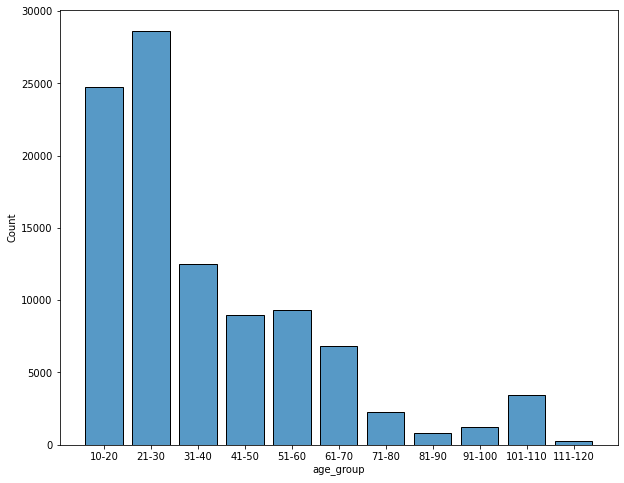

In [10]:
# age group vs count histogram
plt.subplots(figsize = (10,8))
sns.histplot(fb_data_df, x = 'age_group', multiple="dodge", shrink = 0.8)
plt.show()

Looking at above plot we can say that majority of user base is between age group 10 - 40. In depth analysis can be done on why user count for age above 40 is less.

# Gender wise analysis

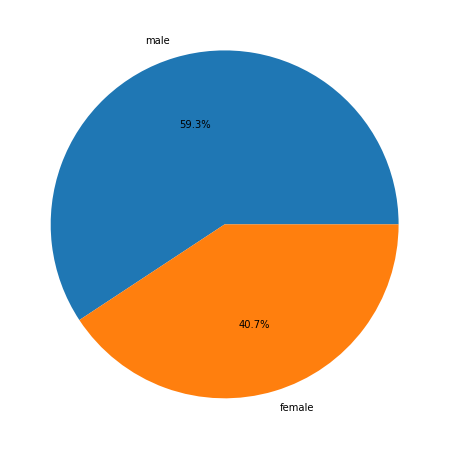

In [11]:
# male female count
gender_counts = fb_data_df['gender'].value_counts()
plt.subplots(figsize=(10,8))
plt.pie(gender_counts, labels = ['male','female'], autopct='%1.1f%%')
plt.show()


Based on above plot we can say that there are more mail users than female users

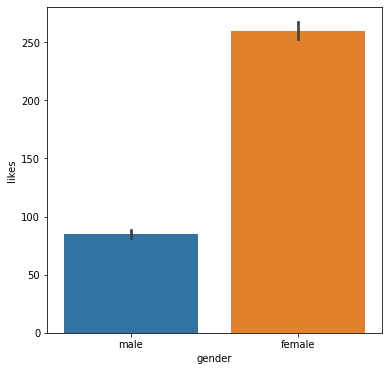

In [12]:
# likes  count vs age group and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes')
plt.show()

As we have seen count of female users is less than male users, but looking at like counts we can say that female users are more active than male users.

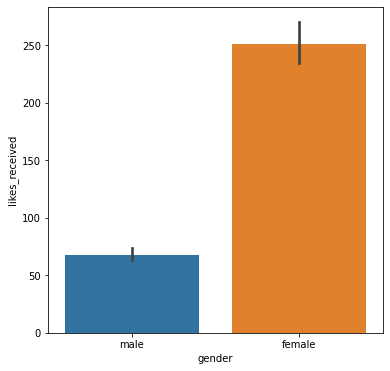

In [13]:
# likes_recieved vs gender  
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'likes_received')
plt.show()

Looking at above plot, we can say that generelly content posted by female users is more liked. 

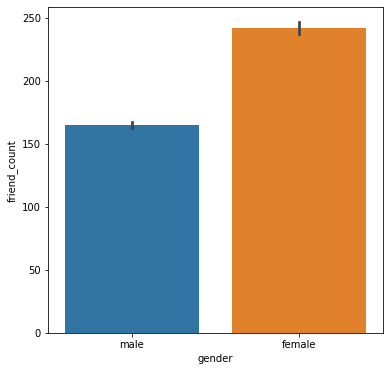

In [14]:
# friend  count vs age groupu and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friend_count')
plt.show()

Female user have more friends than male users

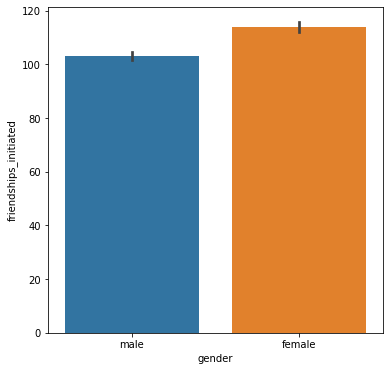

In [15]:
# friendships_initiated vs age group and gender
plt.subplots(figsize = (6,6))
sns.barplot(data = fb_data_df,x = 'gender',y = 'friendships_initiated')
plt.show()

From above plot we can see that, female users do send out more friend requests than male users but there is not much difference.

# Tenure analysis

In [16]:
lables = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
fb_data_df['year_group'] = pd.cut(fb_data_df['tenure'], bins = np.arange(-1, 3285 + 1, 365), labels =lables)
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year


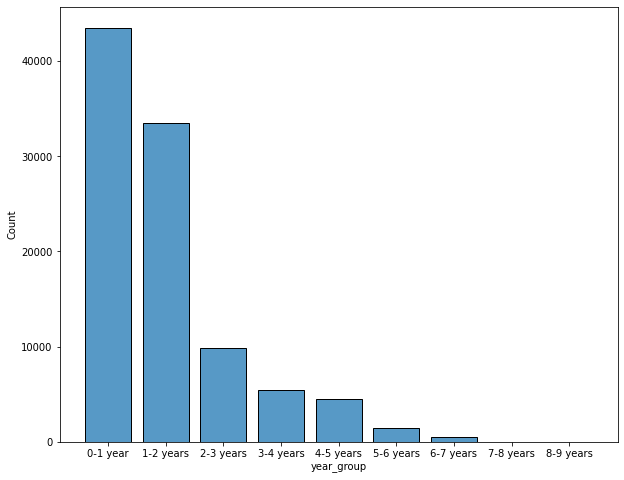

In [17]:
# year group histogram
plt.subplots(figsize = (10,8))
sns.histplot(data = fb_data_df,x = 'year_group', multiple = 'dodge', shrink = 0.8)
plt.show()

From above plot we can see that; majority of user remain on platform or app for around 0 –1 year after which user count drops by 10 % followed by much steeper decrease in user count. Also, we can see that after 5 years on platform most all users stop using platform and look for alternative.

# Active users and inactive user analysis


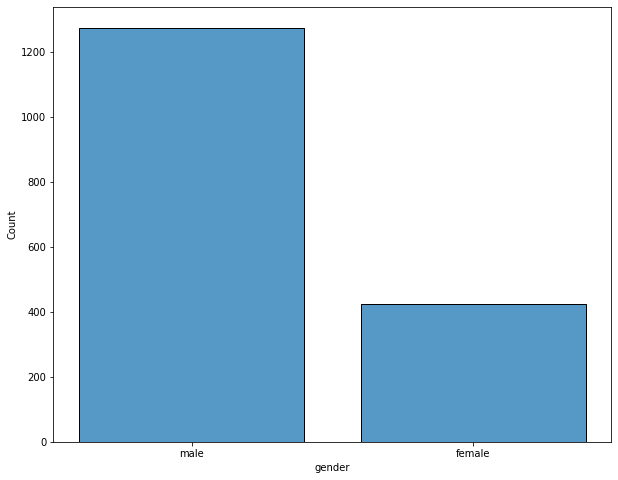

In [18]:
inactive_users = fb_data_df.query('friend_count == 0 and friendships_initiated == 0 and likes == 0')
plt.subplots(figsize = (10,8))
sns.histplot(data = inactive_users, x = 'gender', shrink = 0.8)
plt.show()
    

Looking into above plot we can say that the male users are more inactive than femaleusers

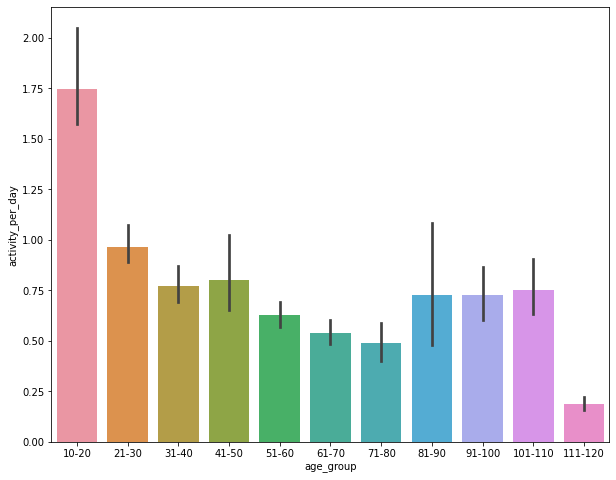

In [19]:
#  age group vs activity per day
fb_data_df['activity_per_day'] = (fb_data_df['friendships_initiated']/fb_data_df['tenure'] + fb_data_df['likes']/fb_data_df['tenure']).replace([np.nan, np.inf, -np.inf], 0)
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'age_group',y = 'activity_per_day')
plt.show()

From above plot we can see that users in age group 10 - 20 are most active

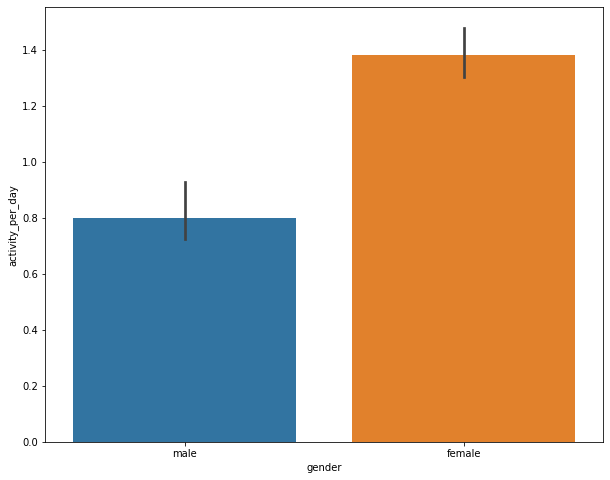

In [20]:
# gender vs activity per day barplot
plt.subplots(figsize = (10,8))
sns.barplot(data = fb_data_df,x = 'gender',y = 'activity_per_day')
plt.show()

From above barplot we can see that female users are far more active than male users

# Web users and mobile user analysis

In [21]:
fb_data_df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group,activity_per_day
0,2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
1,1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
2,2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
3,1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0
4,1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0,10-20,0-1 year,0.0


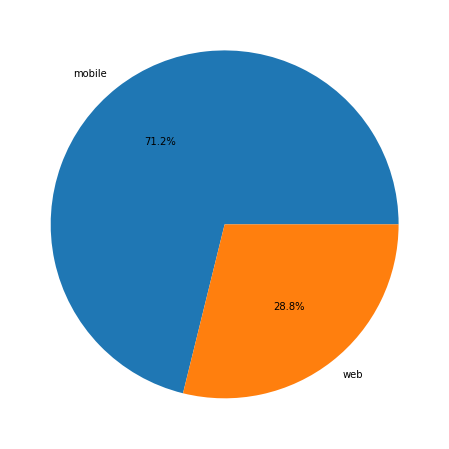

In [22]:
# first get all the active users
active_users = fb_data_df.query("friendships_initiated !=0 and likes != 0").reset_index(drop=True)
# get wich platform they are using
active_users['use_method'] = (active_users['mobile_likes'] >= active_users['www_likes']).replace({True : 'mobile', False : 'web'})

# plot it
plt.subplots(figsize = (10,8))
plt.pie(active_users['use_method'].value_counts(), labels = ['mobile','web'], autopct='%1.1f%%')
plt.show()

From above plot we can see that 71 % of facebook users use it from mobile